# Altimetry

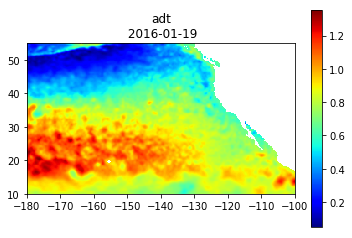

In [1]:
import sys
sys.path.append('../../')
import db
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def plot(lat, lon, data):
    plt.imshow(data, extent=[lon1, lon2, lat1, lat2], origin='bottom', cmap=plt.cm.jet)
    plt.title(field + '\n ' + dt)
    plt.colorbar()
    plt.show()



#field = sla     # sea level anomaly
#field = adt     # absolute dynamic topography
#field = ugos   #absolute zonal velocity
#field = vgos   #absolute meridional velocity
#field = ugosa   #zonal velocity anomaly
#field = vgosa   #meridional velocity anomaly
table = 'tblAltimetry_REP'
field = 'adt'
dt = '2016-01-19'
lat1, lat2, lon1, lon2 = 10, 55, -180, -100  
extV, extVV = None, None
args = [table, field, dt, lat1, lat2, lon1, lon2, extV, extVV]
query = 'EXEC uspRegionalMap ?, ?, ?, ?, ?, ?, ?, ?, ?'
df = db.dbFetchStoredProc(query, args)        
df = pd.DataFrame.from_records(df, columns=['time', 'lat', 'lon', field])
lat = df.lat.unique()
lon = df.lon.unique()
shape = (len(lat), len(lon))
data = df[field].values.reshape(shape)
plot(lat, lon, data)

# CHL (satellite)

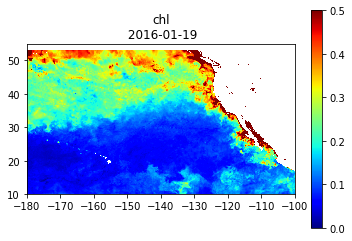

In [5]:
import sys
sys.path.append('../../')
import db
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def plot(lat, lon, data):
    plt.imshow(data, extent=[lon1, lon2, lat1, lat2], origin='bottom', cmap=plt.cm.jet, vmin=0, vmax=5e-1)
    plt.title(field + '\n ' + dt)
    plt.colorbar()
    plt.show()



table = 'tblCHL_OI_REP'
field = 'chl'
dt = '2016-01-19'
lat1, lat2, lon1, lon2 = 10, 55, -180, -100  
extV, extVV = None, None
args = [table, field, dt, lat1, lat2, lon1, lon2, extV, extVV]
query = 'EXEC uspRegionalMap ?, ?, ?, ?, ?, ?, ?, ?, ?'
df = db.dbFetchStoredProc(query, args)        
df = pd.DataFrame.from_records(df, columns=['time', 'lat', 'lon', field])
lat = df.lat.unique()
lon = df.lon.unique()
shape = (len(lat), len(lon))
data = df[field].values.reshape(shape)
plot(lat, lon, data)

# SST (satellite)

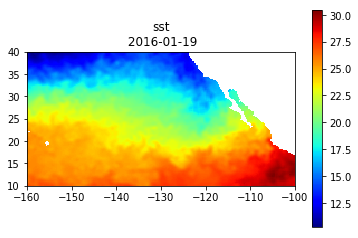

In [6]:
import sys
sys.path.append('../../')
import db
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def plot(lat, lon, data):
    plt.imshow(data, extent=[lon1, lon2, lat1, lat2], origin='bottom', cmap=plt.cm.jet)
    plt.title(field + '\n ' + dt)
    plt.colorbar()
    plt.show()



table = 'tblSST_AVHRR_OI_NRT'
field = 'sst'
dt = '2016-01-19'
lat1, lat2, lon1, lon2 = 10, 40, -160, -100  
extV, extVV = None, None
args = [table, field, dt, lat1, lat2, lon1, lon2, extV, extVV]
query = 'EXEC uspRegionalMap ?, ?, ?, ?, ?, ?, ?, ?, ?'
df = db.dbFetchStoredProc(query, args)        
df = pd.DataFrame.from_records(df, columns=['time', 'lat', 'lon', field])
lat = df.lat.unique()
lon = df.lon.unique()
shape = (len(lat), len(lon))
data = df[field].values.reshape(shape)
plot(lat, lon, data)

# Wind Stress

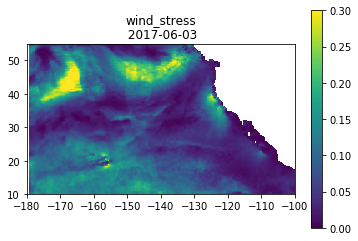

In [7]:
import sys
sys.path.append('../../')
import db
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def plot(lat, lon, data):
    plt.imshow(data, extent=[lon1, lon2, lat1, lat2], origin='bottom', vmin=0, vmax=0.3)
    plt.title(field + '\n ' + dt)
    plt.colorbar()
    plt.show()



table = 'tblWind_NRT'
field = 'wind_stress'
dt = '2017-06-03'
lat1, lat2, lon1, lon2 = 10, 55, -180, -100  
extV, extVV = 'hour', '12'
args = [table, field, dt, lat1, lat2, lon1, lon2, extV, extVV]
query = 'EXEC uspRegionalMap ?, ?, ?, ?, ?, ?, ?, ?, ?'
df = db.dbFetchStoredProc(query, args)        
df = pd.DataFrame.from_records(df, columns=['time', 'lat', 'lon', field])
lat = df.lat.unique()
lon = df.lon.unique()
shape = (len(lat), len(lon))
data = df[field].values.reshape(shape)
plot(lat, lon, data)

# BioGeoChemical Model (Mercator-Pisces)

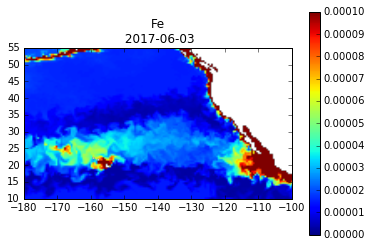

In [7]:
import sys
sys.path.append('../../')
import db
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def getBounds(varName):
    bounds = (None, None)
    if varName.find('Fe') != -1:
        bounds = (0, 1e-4)
    elif varName.find('chl') != -1:
        bounds = (0, 5e-1)
    elif varName.find('O2') != -1:
        bounds = (200, 320)
    elif varName.find('PHYC') != -1:
        bounds = (0, 4)
    elif varName.find('PP') != -1:
        bounds = (0, 4e-2)
    elif varName.find('Si') != -1:
        bounds = (10, 30)
    elif varName.find('NO3') != -1:
        bounds = (0, 20)
    elif varName.find('PO4') != -1:
        bounds = (0, 1.5)
    elif varName.find('wind_stress') != -1:
        bounds = (0, 3e-1)
    elif varName.find('sst') != -1:
        bounds = (0, 32)          
    elif varName.find('sla') != -1:
        bounds = (-0.3, 0.3)          
    return bounds


def plot(field, lat, lon, data):
    bounds = getBounds(field)
    plt.imshow(data, extent=[lon1, lon2, lat1, lat2], origin='bottom', vmin=bounds[0], vmax=bounds[1])
    plt.title(field + '\n ' + dt)
    plt.colorbar()
    plt.show()



table = 'tblPisces_NRT'
#field = 'CHL'   # Chlorophyll concentration - Mean of the binned pixels
#field = 'Si'    # Mole concentration of Silicalte
#field = 'PHYC'  # Mole concentration of phytoplankton as carbon 
#field = 'PP'    # Net primary productivity of Carbon per unite volume 
#field = 'O2'    # Mole concentration of dissolved Oxygen
#field = 'PO4'   # Mole concentration of Phosphate 
#field = 'NO3'   # Mole concentration of dissolved Nitrate  
field = 'Fe'    # Mole concentration of dissolved Iron 
dt = '2017-06-03'
lat1, lat2, lon1, lon2 = 10, 55, -180, -100  
extV, extVV = 'depth', '0.494024991989'
args = [table, field, dt, lat1, lat2, lon1, lon2, extV, extVV]
query = 'EXEC uspRegionalMap ?, ?, ?, ?, ?, ?, ?, ?, ?'
df = db.dbFetchStoredProc(query, args)        
df = pd.DataFrame.from_records(df, columns=['time', 'lat', 'lon', field])
lat = df.lat.unique()
lon = df.lon.unique()
shape = (len(lat), len(lon))
data = df[field].values.reshape(shape)
#df.to_csv(field+'.csv', index=False)    # export data if needed!
plot(field, lat, lon, data)

Below is the exact values for the model's depth levels (m):

* 0.494024991989
* 1.54137504101
* 2.64566898346
* 3.81949496269
* 5.07822418213
* 6.44061422348
* 7.92956018448
* 9.5729970932
* 11.404999733
* 13.4671401978
* 15.8100700378
* 18.4955596924
* 21.5988197327
* 25.2114105225
* 29.4447307587
* 34.4341506958
* 40.3440513611
* 47.3736915588
* 55.764289856
* 65.8072662354
* 77.8538513184
* 92.3260726929
* 109.729301453
* 130.666000366
* 155.850692749
* 186.125595093
* 222.475204468
* 266.040313721
* 318.127410889
* 380.213012695
* 453.937713623
* 541.088928223
* 643.566772461
* 763.333129883
* 902.339294434
* 1062.43994141
* 1245.29101562
* 1452.25097656
* 1684.28405762
* 1941.89294434
* 2225.07788086
* 2533.3359375
* 2865.70288086
* 3220.82006836
* 3597.03198242
* 3992.48388672
* 4405.22412109
* 4833.29101562
* 5274.78417969
* 5727.91699219
